In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [61]:
train=pd.read_csv('titanic_train.csv')

In [62]:
test=pd.read_csv('titanic_test.csv')

In [63]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [64]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: >

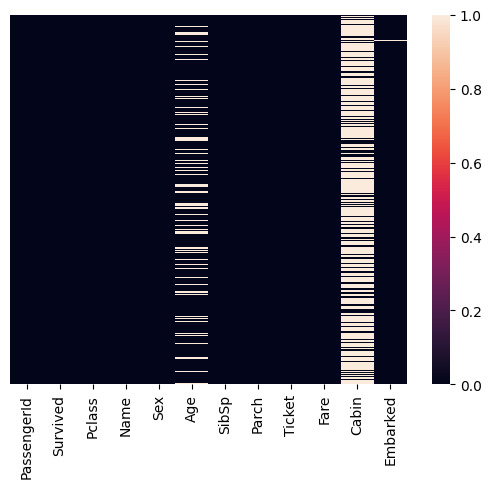

In [65]:
sns.heatmap(data=train.isnull(),yticklabels=False)

<Axes: >

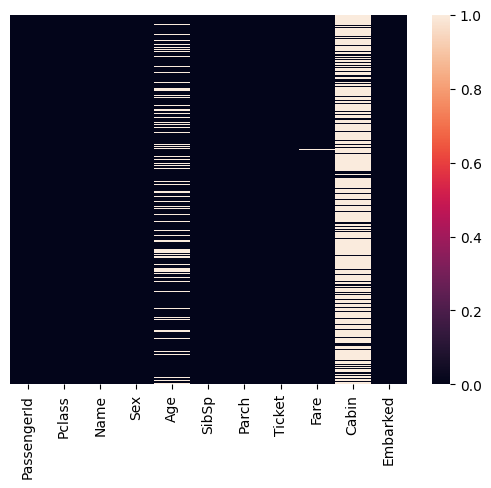

In [66]:
sns.heatmap(data=test.isnull(),yticklabels=False)

<Axes: ylabel='Age'>

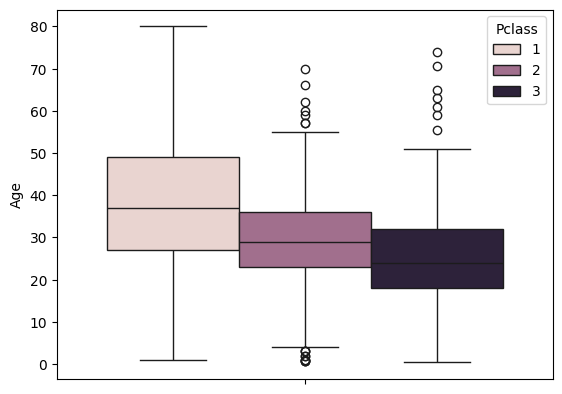

In [67]:
sns.boxplot(data=train,y='Age',hue='Pclass')

In [68]:
pclass1cat=int(train[train['Pclass']==1]['Age'].mean())
pclass2cat=int(train[train['Pclass']==2]['Age'].mean())
pclass3cat=int(train[train['Pclass']==3]['Age'].mean())
print(pclass3cat)
def change_age(df1):
  age=df1[0]
  pclass=df1[1]

  if pd.isnull(age):
    if pclass==1:
      return pclass1cat
    elif pclass==2:
      return pclass2cat
    else:
      return pclass3cat
  else:
    return age

25


In [69]:
int(train[train['Pclass']==3]['Age'].mean())

25

In [70]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [71]:
train['Age']=train[['Age','Pclass']].apply(change_age,axis=1)

C:\Users\kannoth\AppData\Local\Temp\ipykernel_17228\3389614825.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age=df1[0]
C:\Users\kannoth\AppData\Local\Temp\ipykernel_17228\3389614825.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass=df1[1]


In [72]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<Axes: >

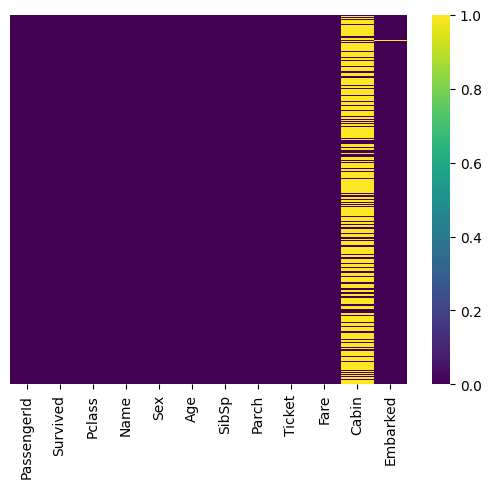

In [73]:
sns.heatmap(data=train.isnull(),yticklabels=False,cmap='viridis')

In [74]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


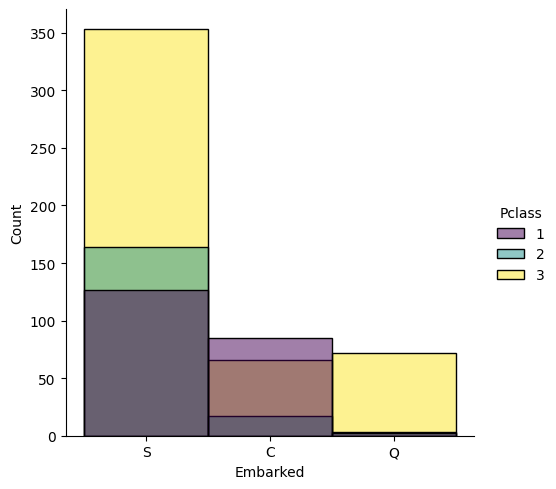

In [16]:
sns.displot(data=train,x='Embarked',hue='Pclass',palette='viridis')

In [76]:
#train.loc[train['Embarked'].isnull()]['Embarked']='S'
train.loc[train['Embarked'].isnull(),'Embarked']='S'

In [77]:
train.loc[829]

PassengerId                                          830
Survived                                               1
Pclass                                                 1
Name           Stone, Mrs. George Nelson (Martha Evelyn)
Sex                                               female
Age                                                 62.0
SibSp                                                  0
Parch                                                  0
Ticket                                            113572
Fare                                                80.0
Cabin                                                B28
Embarked                                               S
Name: 829, dtype: object

<Axes: >

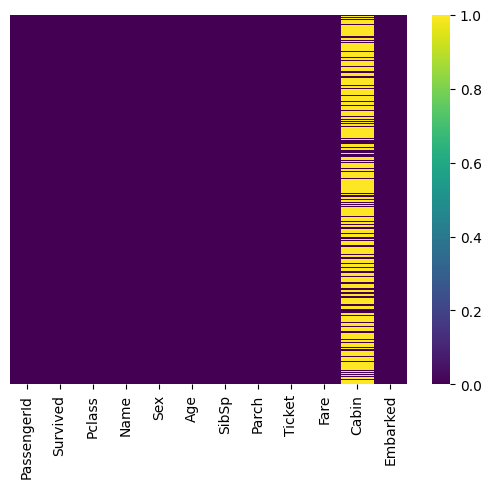

In [78]:
sns.heatmap(data=train.isnull(),yticklabels=False,cmap='viridis')

In [19]:
train.drop('Cabin',axis=1,inplace=True)

<Axes: >

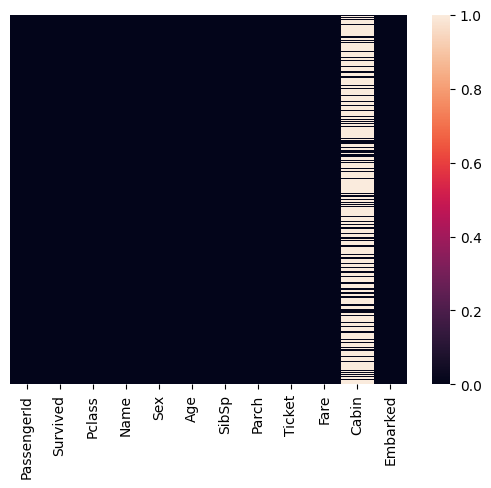

In [79]:
sns.heatmap(data=train.isnull(),yticklabels=False,)

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [83]:
embarkeddf=pd.get_dummies(train['Embarked'],drop_first=True)
embarkeddf

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [84]:
sexdf=pd.get_dummies(train['Sex'],drop_first=True)
sexdf

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [85]:
train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [87]:
train=pd.concat([train,embarkeddf,sexdf],axis=1)


In [88]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False,True,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False,True,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,NaN,S,False,True,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,False,False,True


<Axes: >

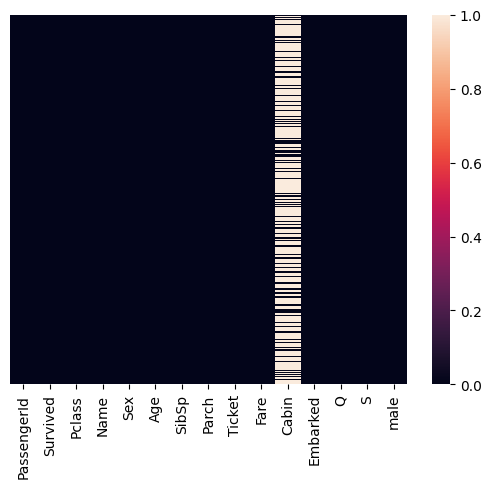

In [89]:
sns.heatmap(data=train.isnull(),yticklabels=False,)

In [97]:
traincopy=train.drop(['PassengerId','Name','Sex','Ticket','Cabin','Embarked'],axis=1,)

<Axes: >

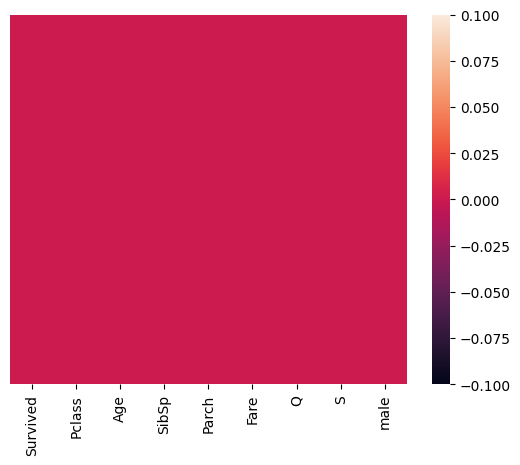

In [98]:
sns.heatmap(data=traincopy.isnull(),yticklabels=False,)

In [99]:
pclassdf=pd.get_dummies(traincopy['Pclass'],drop_first=True)
pclassdf

,2,3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True
...,...,...
886,True,False
887,False,False
888,False,True
889,False,False


<Axes: >

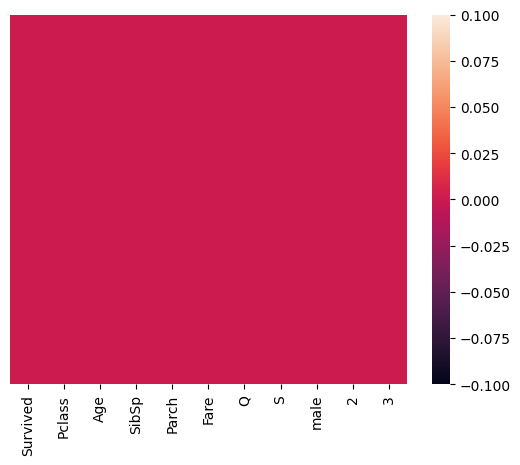

In [101]:
traincopy=pd.concat([traincopy,pclassdf],axis=1)
sns.heatmap(data=traincopy.isnull(),yticklabels=False,)

In [102]:
traincopy.drop(['Pclass'],axis=1,inplace=True)
train.drop(['PassengerId','Name','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True)

<Axes: >

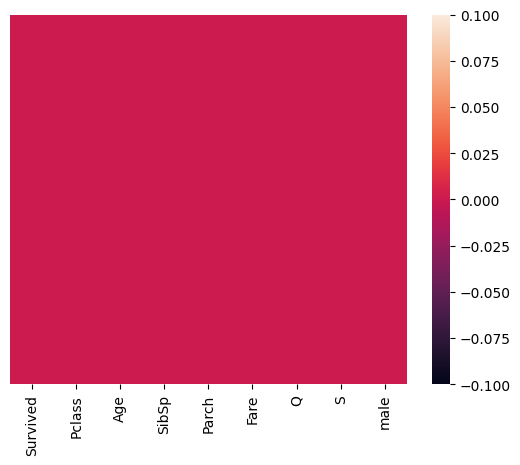

In [104]:
sns.heatmap(data=train.isnull(),yticklabels=False,)

In [107]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0,3,22.0,1,0,7.2500,False,True,True
1,1,1,38.0,1,0,71.2833,False,False,False


In [108]:
#CREATING MODEL FOR TRAINING

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [110]:
logmodel1=LogisticRegression()

In [111]:
X_train=train[['Pclass','Age','SibSp','Parch','Fare','Q','S','male']]
y_train=train['Survived']

In [112]:
logmodel1.fit(X_train,y_train)

f:\EDU CODING\PYTHON STP\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [113]:
#clearing test dataframe

In [115]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: >

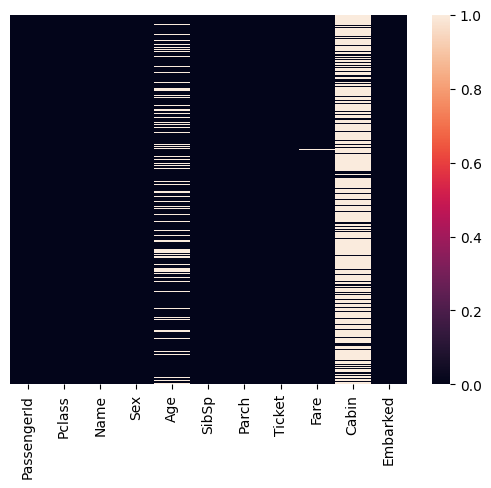

In [117]:
sns.heatmap(data=test.isnull(),yticklabels=False,)

In [118]:
test['Age']=test[['Age','Pclass']].apply(change_age,axis=1)

C:\Users\kannoth\AppData\Local\Temp\ipykernel_17228\3389614825.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age=df1[0]
C:\Users\kannoth\AppData\Local\Temp\ipykernel_17228\3389614825.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass=df1[1]


<Axes: >

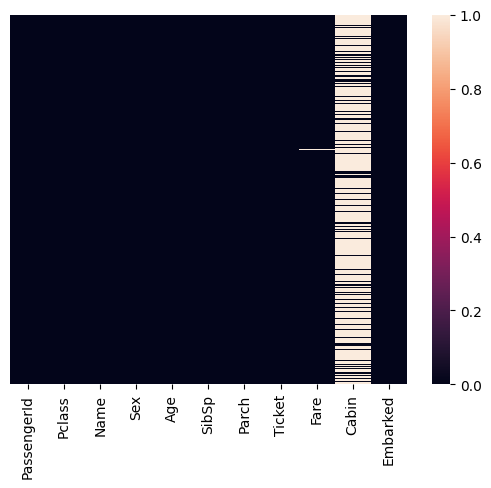

In [119]:
sns.heatmap(data=test.isnull(),yticklabels=False,)

In [150]:
int(test[test['Pclass']==3]['Fare'].mean())

12

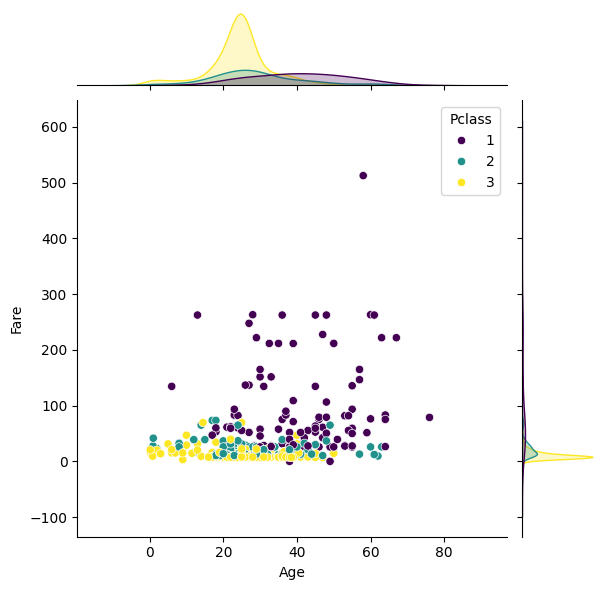

In [136]:
sns.jointplot(data=test,x='Age',y='Fare',hue='Pclass',palette='viridis')

In [157]:
test.loc[test['Fare'].isnull(),'Fare']=12

In [158]:
test.loc[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<Axes: >

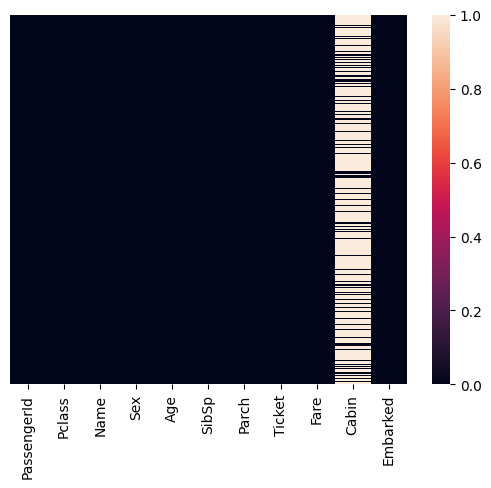

In [159]:
sns.heatmap(data=test.isnull(),yticklabels=False,)

In [161]:
sexdf1=pd.get_dummies(test['Sex'],drop_first=True)
sexdf1

,male
0,True
1,False
2,True
3,True
4,False
...,...
413,True
414,False
415,True
416,True


In [162]:
embarkeddf1=pd.get_dummies(test['Embarked'],drop_first=True)
embarkeddf1

,Q,S
0,True,False
1,False,True
2,True,False
3,False,True
4,False,True
...,...,...
413,False,True
414,False,False
415,False,True
416,False,True


In [165]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,True,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,True,True,False
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,True,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,False,False,True


In [172]:
test=pd.concat([test,embarkeddf1,sexdf1,],axis=1)

In [167]:
test.drop(['PassengerId','Name','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True)

<Axes: >

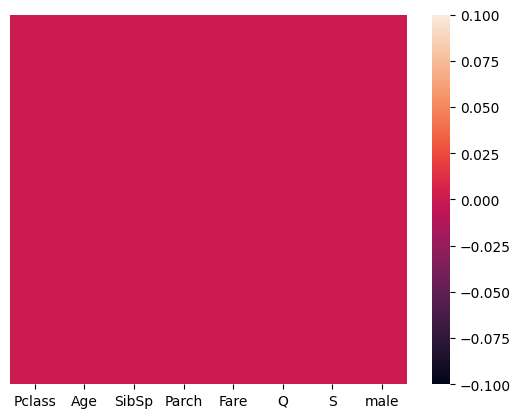

In [173]:
sns.heatmap(data=test.isnull(),yticklabels=False,)

<Axes: >

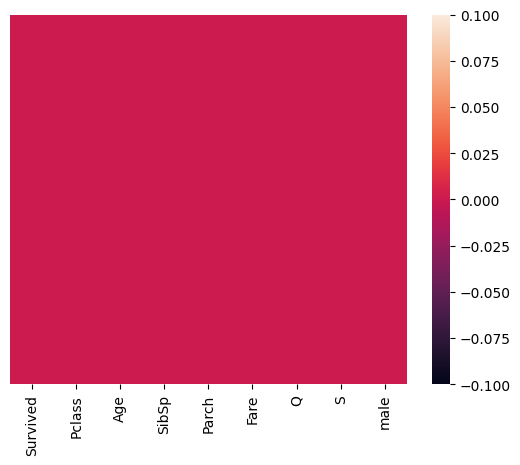

In [169]:
sns.heatmap(data=train.isnull(),yticklabels=False,)

In [170]:
test=pd.concat()

In [176]:
pclassdf1=pd.get_dummies(test['Pclass'],drop_first=True)

In [181]:
testcopy1=pd.concat([test,pclassdf1],axis=1)

<Axes: >

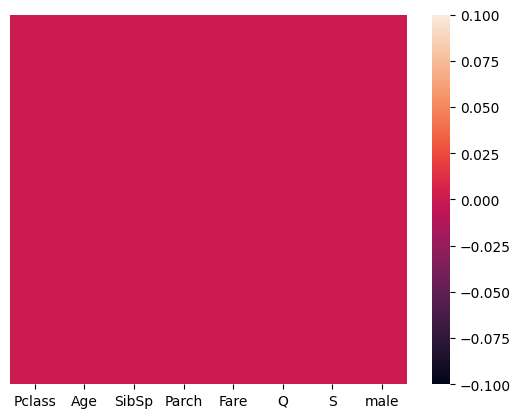

In [184]:
sns.heatmap(data=test.isnull(),yticklabels=False,)

In [194]:
testcopy1.drop(['Pclass'],axis=1,inplace=True)

<Axes: >

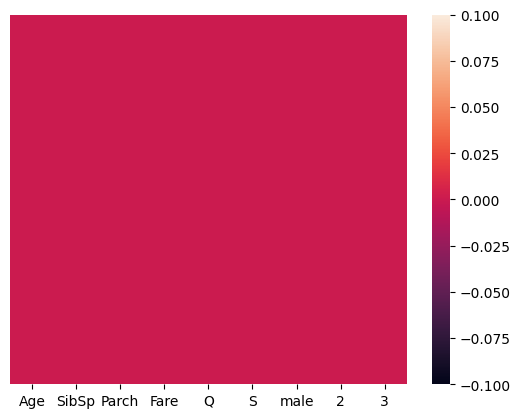

In [195]:
sns.heatmap(data=testcopy1.isnull(),yticklabels=False,)

In [183]:
#predicting model

In [185]:
X_test=test

In [186]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,3,34.5,0,0,7.8292,True,False,True
1,3,47.0,1,0,7.0000,False,True,False
2,2,62.0,0,0,9.6875,True,False,True
3,3,27.0,0,0,8.6625,False,True,True
4,3,22.0,1,1,12.2875,False,True,False
...,...,...,...,...,...,...,...,...
413,3,25.0,0,0,8.0500,False,True,True
414,1,39.0,0,0,108.9000,False,False,False
415,3,38.5,0,0,7.2500,False,True,True
416,3,25.0,0,0,8.0500,False,True,True


In [187]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,3,22.0,1,0,7.2500,False,True,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,True,False
3,1,35.0,1,0,53.1000,False,True,False
4,3,35.0,0,0,8.0500,False,True,True
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,False,True,True
887,1,19.0,0,0,30.0000,False,True,False
888,3,25.0,1,2,23.4500,False,True,False
889,1,26.0,0,0,30.0000,False,False,True


In [188]:
predictions=logmodel1.predict(X_test)

In [189]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,